# Enhancing Accessibility to Green Spaces through Urban Tree Mapping

**Duration**: 90 minutes  
**Level**: Intermediate  
**Pre-requisite Skills**: Python  

## Scenario

Melbourne is renowned for its dedication to sustainable development and rapid urban growth. Urban planners and environmental specialists are faced with the challenge of making sure that green spaces, especially trees, are divided fairly throughout communities as the city grows. Because trees are crucial for lowering urban heat islands, boosting air quality, and improving general well-being, the provision of green areas becomes increasingly important as population density rises, both for the environment and for the quality of life of locals.

Using information on tree species, planting year, and location, this use case examines the spatial distribution of trees in Melbourne. By looking at these factors in conjunction with data on population density,Our goal is to discover regions that lack enough greenery and comprehend how green spaces are spread among various urban districts. In order to maximize tree planting and improve accessibility to green spaces for all citizens, the objective is to offer practical insights to government organizations, urban planners, and community stakeholders.

We will identify trends in tree diversity and density among precincts, examine the relationship between increased urban density and older or more mature trees, and determine whether regions with less tree cover are associated with faster population growth. We'll also examine how various species fare in diverse urban environments and how trees may help alleviate environmental issues like pollution and heat stress.

Stakeholders can use these findings to make well-informed decisions regarding future tree planting, green ensuring that Melbourne remains a livable, ecologically resilient city for its citizens through space development and urban sustainability programs.


### Problem Description


Ensuring fair access to green spaces, especially trees, is becoming more and more important as Melbourne grows and becomes more urbanized. Although there are many parks and green spaces in the city, not every neighborhood has the same amount of trees. Because of this unequal distribution, some metropolitan areas may see environmental deterioration, such as increased temperatures, poor air quality, and restricted access to the outdoors. Furthermore, as Melbourne's population grows, districts with little tree cover would find it difficult to satisfy the city's increasing need for public green spaces.

Determining where more trees should be planted to improve the city's green infrastructure is a problem for urban planners and local government representatives. Environmentalists and community members are also worried about the negative effects of air pollution, urban heat islands, and biodiversity loss brought on by a lack of green areas on the environment and human health. The importance of urban trees is becoming more widely acknowledged, yet little is known about their diversity, spatial distribution, and link to urban congestion.

### This challenge uses population density data and datasets like "Tree Locations and Species" to:

Examine how trees are distributed throughout Melbourne's many neighborhoods and districts.
Examine how the distribution of trees and the availability of green spaces are affected by urban density.

Determine whether locations lack enough greenery so that more trees can be planted there to enhance the environment and public health.

Find trends that demonstrate how the advantages that particular tree species and their ages offer to the urban environment.

Provide politicians and urban planners with evidence-based suggestions for improving Melbourne's urban green infrastructure, making sure that trees are planted where they will be most useful and have the biggest impact.
By tackling these issues, the objective is to establish a more sustainable,healthier, and more livable Melbourne for its growing population.


## Introduction

Making sure that green spaces, especially trees, are distributed fairly is becoming more and more crucial as Melbourne's urban area continues to grow quickly. Because they reduce urban heat islands, improve air quality, and give locals access to vital green spaces, trees are necessary for a healthy ecosystem. The city's tree distribution is uneven, though, and some neighborhoods lack enough green space, which poses problems for the environment and public health. Using datasets on tree species, planting year, and location, this use case examines the spatial distribution of trees in Melbourne. The objective is to identify regions with inadequate tree coverage and give urban planners information for more strategic tree planting by analyzing the distribution of trees in relation to urban density.




##Loading Datasets


Load the dataset containing Building Information dataset, and Greening Potential dataset, load them into your Python environment using Pandas for general data manipulation and Geopandas for spatial data handling, to prepare them for analysis of urban green space distribution and planning.

In [3]:
import requests
import pandas as pd
import geopandas as gpd
from io import StringIO


# Define the API endpoint for each dataset

datasets = {
    'trees_data': {
        'dataset_id': 'trees-with-species-and-dimensions-urban-forest',
        'format': 'csv',
    },
    'tree_canopies_data': {
        'dataset_id': 'tree-canopies-2021-urban-forest',
        'format': 'csv',
    },
    'laneways_data': {
        'dataset_id': 'laneways-with-greening-potential',
        'format': 'geojson',
    },
    'open_space_contributions_data': {
        'dataset_id': 'public-open-space-contribution-register',
        'format': 'csv',
    }
}

# Function to fetch data from the API
def fetch_data(dataset_id, format='csv'):
    url = f'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/{dataset_id}/exports/{format}'

    params = {
        'select': '*',  # Select all columns
        'limit': -1,  # Fetch all data
        'lang': 'en',
        'timezone': 'UTC'
    }

    # Make the API request
    response = requests.get(url, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # If CSV format, load into a Pandas DataFrame
        if format == 'csv':
            data = pd.read_csv(StringIO(response.text), delimiter=';')  # CSV uses ';' as delimiter
        elif format == 'geojson':
            data = response.json()  # If GeoJSON format, parse the data as JSON
        return data
    else:
        print(f"Failed to fetch data from API for dataset {dataset_id}. Status code: {response.status_code}")
        return None

# Fetch data for each dataset
trees_data = fetch_data(datasets['trees_data']['dataset_id'], datasets['trees_data']['format'])
tree_canopies_data = fetch_data(datasets['tree_canopies_data']['dataset_id'], datasets['tree_canopies_data']['format'])
laneways_data = fetch_data(datasets['laneways_data']['dataset_id'], datasets['laneways_data']['format'])
open_space_contributions_data = fetch_data(datasets['open_space_contributions_data']['dataset_id'], datasets['open_space_contributions_data']['format'])

# Check and display the first few rows of each dataset
if trees_data is not None:
    print(trees_data.head())
if tree_canopies_data is not None:
    print(tree_canopies_data.head())
# For laneways data (which is a GeoDataFrame)
if laneways_data is not None:
    # Convert the GeoJSON dictionary into a GeoDataFrame
    laneways_gdf = gpd.GeoDataFrame.from_features(laneways_data['features'])

    # Now, you can use head() on the GeoDataFrame
    print(laneways_gdf.head())
if open_space_contributions_data is not None:
    print(open_space_contributions_data.head())


    com_id                 common_name        scientific_name         genus  \
0  1029241                London Plane  Platanus x acerifolia      Platanus   
1  1357481                Cyprus Plane    Platanus orientalis      Platanus   
2  1022615                 Spotted Gum      Corymbia maculata      Corymbia   
3  1584225  Mexican or Washington Palm   Washingtonia robusta  Washingtonia   
4  1042546               Golden Wattle       Acacia pycnantha        Acacia   

        family  diameter_breast_height  year_planted date_planted  \
0  Platanaceae                    59.0          1997   1997-12-04   
1  Platanaceae                     8.0          2008   2008-03-12   
2    Myrtaceae                    73.0          1997   1997-11-10   
3    Arecaceae                     NaN          2015   2015-06-19   
4     Fabaceae                     NaN          1998   1998-11-20   

  age_description    useful_life_expectency  useful_life_expectency_value  \
0          Mature  6-10 years (>5

In [7]:
# First, check the content of the 'geo_point_2d' column to see how the coordinates are stored
print(tree_canopies_data['geo_point_2d'].head())

# Extract latitude and longitude from 'geo_point_2d' column (assuming the format is 'lat, lon')
tree_canopies_data[['latitude', 'longitude']] = tree_canopies_data['geo_point_2d'].str.extract(r'(-?\d+\.\d+),\s*(-?\d+\.\d+)')

# Convert latitude and longitude to numeric (in case they were read as strings)
tree_canopies_data['latitude'] = pd.to_numeric(tree_canopies_data['latitude'], errors='coerce')
tree_canopies_data['longitude'] = pd.to_numeric(tree_canopies_data['longitude'], errors='coerce')

# Verify the extraction by checking the first few rows
print(tree_canopies_data[['latitude', 'longitude']].head())


0     -37.77506304683423, 144.93898465421296
1    -37.775132956993566, 144.93979253397976
2     -37.77515941768105, 144.93986878938023
3     -37.775130649990984, 144.9389679196713
4     -37.77518700935825, 144.93875479828375
Name: geo_point_2d, dtype: object
    latitude   longitude
0 -37.775063  144.938985
1 -37.775133  144.939793
2 -37.775159  144.939869
3 -37.775131  144.938968
4 -37.775187  144.938755


In [14]:
import pandas as pd
import geopandas as gpd

# Step 1: Clean Tree Data
# Print initial data before cleaning
print("Before cleaning trees_data:")
print(trees_data.head())

# Drop rows with missing latitude or longitude
trees_data = trees_data.dropna(subset=['latitude', 'longitude'])

# Check for NaN values in latitude and longitude columns
print("After dropping rows with missing latitude/longitude in trees_data:")
print(trees_data.isna().sum())

# Convert latitude and longitude to numeric
trees_data['latitude'] = pd.to_numeric(trees_data['latitude'], errors='coerce')
trees_data['longitude'] = pd.to_numeric(trees_data['longitude'], errors='coerce')

# Check if the conversion worked
print("After converting latitude and longitude to numeric:")
print(trees_data.head())

# Convert Tree Data to a GeoDataFrame
trees_gdf = gpd.GeoDataFrame(trees_data, geometry=gpd.points_from_xy(trees_data['longitude'], trees_data['latitude']))

# Set the CRS (Coordinate Reference System) to EPSG:4326 (WGS84)
trees_gdf.set_crs("EPSG:4326", inplace=True)

# Remove any rows with invalid geometry
trees_gdf = trees_gdf.dropna(subset=['geometry'])

# Print the cleaned data
print("After cleaning and converting to GeoDataFrame:")
print(trees_gdf.head())

# Step 2: Clean Tree Canopies Data
# Drop rows with missing latitude or longitude
tree_canopies_data = tree_canopies_data.dropna(subset=['latitude', 'longitude'])

# Convert latitude and longitude to numeric
tree_canopies_data['latitude'] = pd.to_numeric(tree_canopies_data['latitude'], errors='coerce')
tree_canopies_data['longitude'] = pd.to_numeric(tree_canopies_data['longitude'], errors='coerce')

# Convert Tree Canopy Data to a GeoDataFrame
tree_canopies_gdf = gpd.GeoDataFrame(tree_canopies_data, geometry=gpd.points_from_xy(tree_canopies_data['longitude'], tree_canopies_data['latitude']))

# Set the CRS (Coordinate Reference System) to EPSG:4326 (WGS84)
tree_canopies_gdf.set_crs("EPSG:4326", inplace=True)

# Remove any rows with invalid geometry
tree_canopies_gdf = tree_canopies_gdf.dropna(subset=['geometry'])

# Print the cleaned data
print("After cleaning and converting to GeoDataFrame:")
print(tree_canopies_gdf.head())

# Step 3: Clean Laneways Data (GeoJSON to GeoDataFrame)
if isinstance(laneways_data, dict):  # Check if it's in GeoJSON format
    laneways_gdf = gpd.GeoDataFrame.from_features(laneways_data['features'])

    # Ensure GeoDataFrame has the correct CRS
    laneways_gdf.set_crs("EPSG:4326", inplace=True)

# Check if the laneways data is valid
print("After cleaning laneways data:")
print(laneways_gdf.head())

# Step 4: Clean Open Space Contributions Data
# Fill missing values in numerical columns with 0 (or other appropriate values)
open_space_contributions_data = open_space_contributions_data.fillna(0)

# Convert 'contribution_amount' to numeric if it's not already
open_space_contributions_data['contribution_amount'] = pd.to_numeric(open_space_contributions_data['contribution_amount'], errors='coerce')

# Extract latitude and longitude from the geo_point_2d column if needed
open_space_contributions_data[['latitude', 'longitude']] = open_space_contributions_data['geo_point_2d'].str.split(',', expand=True)

# Convert the new latitude and longitude columns to numeric values
open_space_contributions_data['latitude'] = pd.to_numeric(open_space_contributions_data['latitude'], errors='coerce')
open_space_contributions_data['longitude'] = pd.to_numeric(open_space_contributions_data['longitude'], errors='coerce')

# Check if the conversion worked
print("After extracting latitude and longitude for open_space_contributions_data:")
print(open_space_contributions_data.head())

# Remove any rows with invalid coordinates (if necessary)
open_space_contributions_data = open_space_contributions_data.dropna(subset=['latitude', 'longitude'])

# Print the cleaned data
print("After cleaning open_space_contributions_data:")
print(open_space_contributions_data.head())


Before cleaning trees_data:
    com_id                 common_name        scientific_name         genus  \
0  1029241                London Plane  Platanus x acerifolia      Platanus   
1  1357481                Cyprus Plane    Platanus orientalis      Platanus   
2  1022615                 Spotted Gum      Corymbia maculata      Corymbia   
3  1584225  Mexican or Washington Palm   Washingtonia robusta  Washingtonia   
4  1042546               Golden Wattle       Acacia pycnantha        Acacia   

        family  diameter_breast_height  year_planted date_planted  \
0  Platanaceae                    59.0          1997   1997-12-04   
1  Platanaceae                     8.0          2008   2008-03-12   
2    Myrtaceae                    73.0          1997   1997-11-10   
3    Arecaceae                     NaN          2015   2015-06-19   
4     Fabaceae                     NaN          1998   1998-11-20   

  age_description    useful_life_expectency  useful_life_expectency_value  \
0    

    com_id                 common_name        scientific_name         genus  \
0  1029241                London Plane  Platanus x acerifolia      Platanus   
1  1357481                Cyprus Plane    Platanus orientalis      Platanus   
2  1022615                 Spotted Gum      Corymbia maculata      Corymbia   
3  1584225  Mexican or Washington Palm   Washingtonia robusta  Washingtonia   
4  1042546               Golden Wattle       Acacia pycnantha        Acacia   

        family  diameter_breast_height  year_planted date_planted  \
0  Platanaceae                    59.0          1997   1997-12-04   
1  Platanaceae                     8.0          2008   2008-03-12   
2    Myrtaceae                    73.0          1997   1997-11-10   
3    Arecaceae                     NaN          2015   2015-06-19   
4     Fabaceae                     NaN          1998   1998-11-20   

  age_description    useful_life_expectency  ...  precinct  located_in  \
0          Mature  6-10 years (>50% 

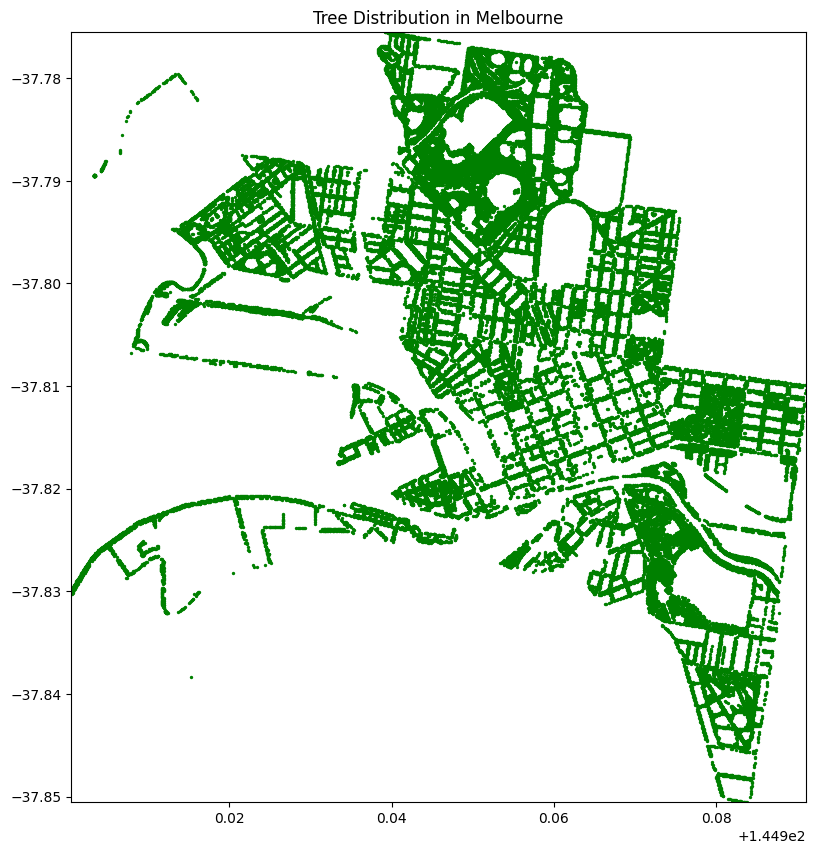

In [27]:
import matplotlib.pyplot as plt

# Check if the GeoDataFrame contains valid points
print(trees_gdf.head())  # Print first few rows to verify

# Plot the tree distribution on a map with reduced point size
fig, ax = plt.subplots(figsize=(10, 10))
trees_gdf.plot(marker='o', color='green', markersize=2, ax=ax)

# Auto-adjust axis limits based on the data's bounds
ax.set_xlim(trees_gdf.bounds['minx'].min(), trees_gdf.bounds['maxx'].max())
ax.set_ylim(trees_gdf.bounds['miny'].min(), trees_gdf.bounds['maxy'].max())

plt.title("Tree Distribution in Melbourne")
plt.show()
